# import libraries

In [10]:
!pip3 install gluoncv
!pip3 install mxnet

In [11]:
import pandas as pd
import numpy as np
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

# use SSD model to label data automaticaly

In [12]:
path_to_imgs = '/content/drive/MyDrive/Car_Images/'
img_files = ['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg',
             '8.jpg','9.jpg','10.jpg','11.jpg','12.jpg','13.jpg','14.jpg','15.jpg','16.jpg','17.jpg',
             '18.jpg','19.jpg','20.jpg','21.jpg','22.jpg','23.jpg','24.jpg','25.jpg','26.jpg']

In [25]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)

/usr/local/lib/python3.7/dist-packages/mxnet/gluon/block.py:1784: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


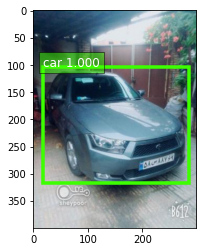

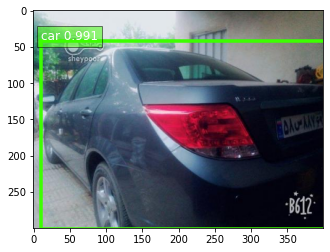

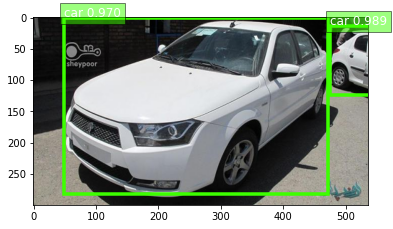

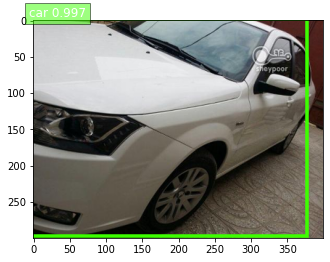

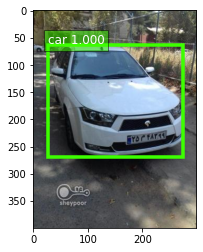

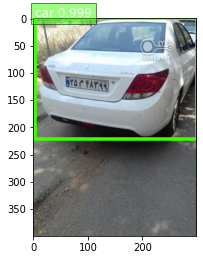

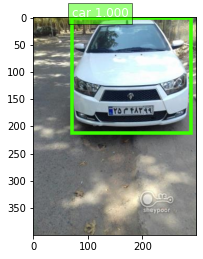

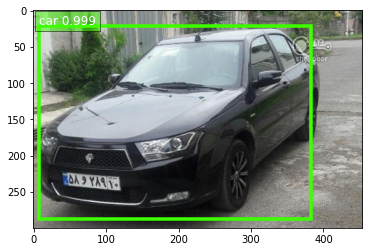

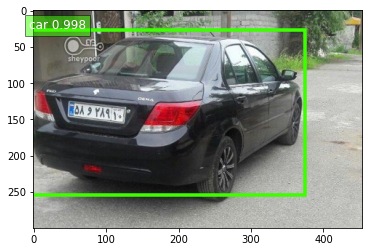

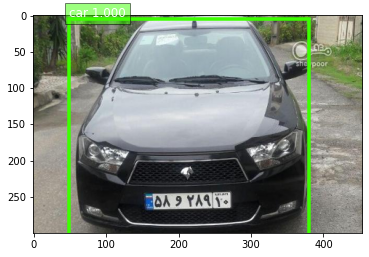

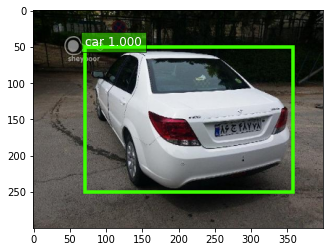

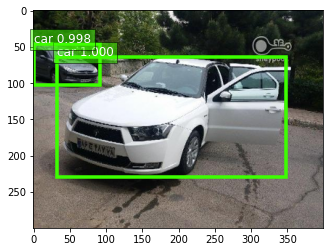

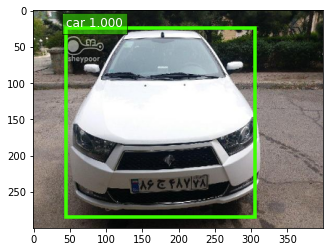

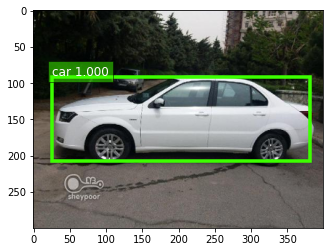

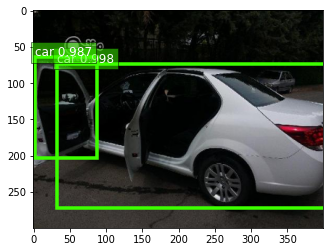

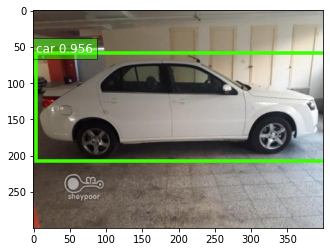

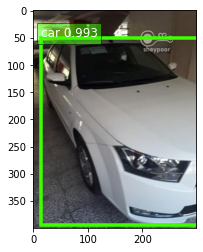

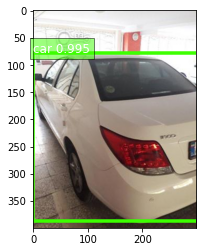

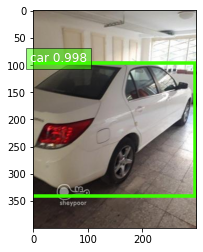

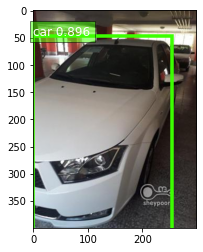

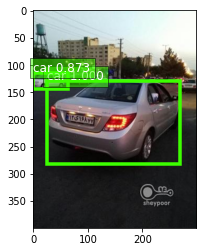

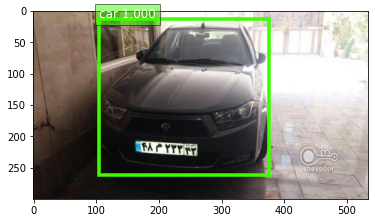

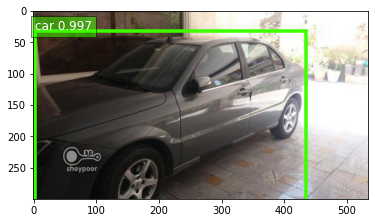

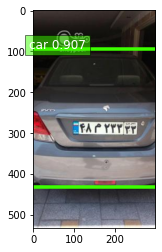

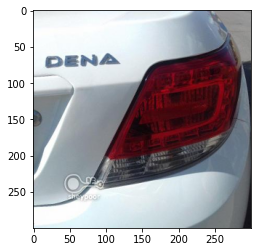

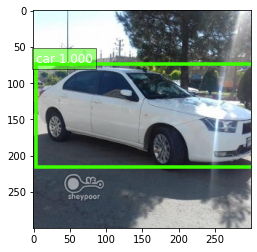

In [27]:
import cv2
inputs = [path_to_imgs+img for img in img_files]
for i in range(len(inputs)):
  x, orig_img = data.transforms.presets.ssd.load_test(inputs[i], short = 300)
  box_ids, scores, bboxes = net(x)
  ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0],thresh=0.80, class_names=net.classes)
  plt.show()

In [34]:
x, orig_img = data.transforms.presets.ssd.load_test(inputs[0], short=300)
box_ids, scores, bboxes = net(x)
box_ids[0].shape

(100, 1)

In [35]:
import numpy as np
def get_best_bboxes(box_ids, scores, bboxes, threshold=0.98):
  best_scores = []
  best_bboxes = []
  for i in range(100):
    if box_ids[0][i] == net.classes.index("car") and scores[0][i] > threshold:
      best_scores.append(scores[0][i])
      best_bboxes.append(bboxes[0][i])
  return best_scores, best_bboxes

In [38]:
inputs = [path_to_imgs+img for img in img_files]
for i in range(len(inputs)):
  print(inputs[i])
  x, orig_img = data.transforms.presets.ssd.load_test(inputs[i], short=300)
  box_ids, scores, bboxes = net(x)
  print(get_best_bboxes(box_ids, scores, bboxes, 0.8))
  print("*************************************************")

/content/drive/MyDrive/Car_Images/1.jpg
([
[0.9998772]
<NDArray 1 @cpu(0)>], [
[ 18.840836 104.51554  286.09705  318.1687  ]
<NDArray 4 @cpu(0)>])
*************************************************
/content/drive/MyDrive/Car_Images/2.jpg
([
[0.9912491]
<NDArray 1 @cpu(0)>], [
[ 10.41394   42.156555 403.3765   301.38446 ]
<NDArray 4 @cpu(0)>])
*************************************************
/content/drive/MyDrive/Car_Images/3.jpg
([
[0.9893364]
<NDArray 1 @cpu(0)>, 
[0.97042435]
<NDArray 1 @cpu(0)>], [
[474.18332   14.289841 540.88916  123.73013 ]
<NDArray 4 @cpu(0)>, 
[ 49.16382     1.8900452 472.2279    283.61148  ]
<NDArray 4 @cpu(0)>])
*************************************************
/content/drive/MyDrive/Car_Images/4.jpg
([
[0.9970849]
<NDArray 1 @cpu(0)>], [
[ -6.378647   -3.0536346 377.24213   297.2356   ]
<NDArray 4 @cpu(0)>])
*************************************************
/content/drive/MyDrive/Car_Images/5.jpg
([
[0.9999267]
<NDArray 1 @cpu(0)>], [
[ 26.176392  63.84838 